<p style="color: #F39C12; font-size: 45px"><b>PANDAS</b></p>

<p style="color: #73C6B6; font-size: 22px">NOTE: You can find CSV files in <b>Week-4-Pandas.zip</b></p>

In [ ]:
import pandas as pd
import numpy as np

### PANDAS SERIES

In [6]:
# ser = pd.Series([100, 200, 300, 400, 500], ['Tom', 'Bob', 'Nancy', 'Dan', 'Eric']) # we can define like this
ser = pd.Series(data=[100, 'foo', 300.5, 400, 500], index=['Tom', 'Bob', 'Nancy', 'Dan', 'Eric'])
ser

Tom        100
Bob        foo
Nancy    300.5
Dan        400
Eric       500
dtype: object

In [7]:
ser.index

Index(['Tom', 'Bob', 'Nancy', 'Dan', 'Eric'], dtype='object')

In [10]:
ser['Nancy']
# ser.loc['Nancy'] # gives the same result as above usage

300.5

In [16]:
ser.loc[['Nancy', 'Bob']]
# ser[['Nancy', 'Bob']] # same as above

Nancy    300.5
Bob        foo
dtype: object

In [17]:
ser[[4, 2, 0]]

Eric       500
Nancy    300.5
Tom        100
dtype: object

In [21]:
ser.iloc[2]

300.5

In [18]:
'Bob' in ser

True

In [20]:
'foo' in ser.values

True

In [22]:
ser * 2 # multiply values by two

Tom         200
Bob      foofoo
Nancy     601.0
Dan         800
Eric       1000
dtype: object

In [ ]:
ser ** 2 # we will have an error because we cant square of string

In [24]:
ser[['Tom', 'Nancy']] ** 2

Tom         10000
Nancy    90300.25
dtype: object

### PANDAS DataFrame

In [31]:
d = {
    'one': pd.Series([100, 200, 300, 400, 500], index=['boo', 'bee', 'bii', 'buu', 'baa']),
    'two': pd.Series([111.1, 211.1, 311.1, 411.1], index=['boo', 'beer', 'bii', 'buu'])
}

df = pd.DataFrame(d)

print(df, '\n')
df

        one    two
baa   500.0    NaN
bee   200.0    NaN
beer    NaN  211.1
bii   300.0  311.1
boo   100.0  111.1
buu   400.0  411.1 



,one,two
baa,500.0,NaN
bee,200.0,NaN
beer,NaN,211.1
bii,300.0,311.1
boo,100.0,111.1
buu,400.0,411.1


In [33]:
df.index

Index(['baa', 'bee', 'beer', 'bii', 'boo', 'buu'], dtype='object')

In [34]:
df.columns

Index(['one', 'two'], dtype='object')

In [35]:
pd.DataFrame(d, index=['bee', 'bii', 'buu'])

,one,two
bee,200,NaN
bii,300,311.1
buu,400,411.1


In [36]:
pd.DataFrame(d, index=['bee', 'bii', 'buu'], columns=['two', 'five'])

,two,five
bee,NaN,NaN
bii,311.1,NaN
buu,411.1,NaN


In [38]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 6, 'alice': 8}]
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,6.0,8.0


In [42]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,6.0,8.0


In [43]:
pd.DataFrame(data, columns=['alex', 'dora', 'alice'])

,alex,dora,alice
0,1.0,NaN,NaN
1,NaN,6.0,8.0


In [44]:
df

,one,two
baa,500.0,NaN
bee,200.0,NaN
beer,NaN,211.1
bii,300.0,311.1
boo,100.0,111.1
buu,400.0,411.1


In [45]:
df['one']

baa     500.0
bee     200.0
beer      NaN
bii     300.0
boo     100.0
buu     400.0
Name: one, dtype: float64

In [46]:
df['three'] = df['one'] * df['two']
df

,one,two,three
baa,500.0,NaN,NaN
bee,200.0,NaN,NaN
beer,NaN,211.1,NaN
bii,300.0,311.1,93330.0
boo,100.0,111.1,11110.0
buu,400.0,411.1,164440.0


In [47]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
baa,500.0,NaN,NaN,True
bee,200.0,NaN,NaN,False
beer,NaN,211.1,NaN,False
bii,300.0,311.1,93330.0,True
boo,100.0,111.1,11110.0,False
buu,400.0,411.1,164440.0,True


In [48]:
three = df.pop('three')
three

baa          NaN
bee          NaN
beer         NaN
bii      93330.0
boo      11110.0
buu     164440.0
Name: three, dtype: float64

In [49]:
df

,one,two,flag
baa,500.0,NaN,True
bee,200.0,NaN,False
beer,NaN,211.1,False
bii,300.0,311.1,True
boo,100.0,111.1,False
buu,400.0,411.1,True


In [50]:
del df['two']
df

,one,flag
baa,500.0,True
bee,200.0,False
beer,NaN,False
bii,300.0,True
boo,100.0,False
buu,400.0,True


In [55]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
baa,500.0,True,500.0
bee,200.0,False,200.0
beer,NaN,False,NaN
bii,300.0,True,300.0
boo,100.0,False,100.0
buu,400.0,True,400.0


In [56]:
df.insert(0, 'copy_of_flag', df['flag'])
df

,copy_of_flag,one,flag,copy_of_one
baa,True,500.0,True,500.0
bee,False,200.0,False,200.0
beer,False,NaN,False,NaN
bii,True,300.0,True,300.0
boo,False,100.0,False,100.0
buu,True,400.0,True,400.0


In [57]:
df['one_upper_half'] = df['one'][:2]
df

,copy_of_flag,one,flag,copy_of_one,one_upper_half
baa,True,500.0,True,500.0,500.0
bee,False,200.0,False,200.0,200.0
beer,False,NaN,False,NaN,NaN
bii,True,300.0,True,300.0,NaN
boo,False,100.0,False,100.0,NaN
buu,True,400.0,True,400.0,NaN


### READ DATA FROM CVS

In [64]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))

movies.head() # head function shows first 5 rows as default
# movies.head(10) # if we want first 10 rows, we can call like this

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [67]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [70]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [71]:
del tags['timestamp']
del ratings['timestamp']

In [74]:
row_0 = tags.iloc[0]
print(type(row_0))

row_0

<class 'pandas.core.series.Series'>


userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [75]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [76]:
row_0['userId']

18

In [77]:
'rating' in row_0

False

In [79]:
row_0.name

0

In [80]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [81]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [82]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [85]:
tags.iloc[[0, 11, 2000]] # indexi 0, 11, 2000 olan elemanları aldık

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


### Descriptive Statistic

In [2]:
ratings2 = pd.read_csv('./movielens/ratings.csv')
ratings2.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
ratings2.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [6]:
ratings2['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [8]:
ratings2.mean()

userId       6.904587e+04
movieId      9.041567e+03
rating       3.525529e+00
timestamp    1.100918e+09
dtype: float64

In [9]:
ratings2['rating'].mean()

3.5255285642993797

In [10]:
ratings2.min()

userId               1.0
movieId              1.0
rating               0.5
timestamp    789652004.0
dtype: float64

In [11]:
ratings2['rating'].min()

0.5

In [12]:
ratings2.max()

userId       1.384930e+05
movieId      1.312620e+05
rating       5.000000e+00
timestamp    1.427784e+09
dtype: float64

In [13]:
ratings2['rating'].max()

5.0

In [14]:
ratings2.std()

userId       4.003863e+04
movieId      1.978948e+04
rating       1.051989e+00
timestamp    1.621694e+08
dtype: float64

In [15]:
ratings2['movieId'].std()

19789.477445413002

In [16]:
ratings2.mode()

,userId,movieId,rating,timestamp
0,118205,296,4.0,825638400


In [19]:
ratings2['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [20]:
ratings2.corr() # değerler arasındaki ilişkiyi ölçer. negatif sonuçlar bu değerlerin biri artarken diğerinin azaldığını ifade eder.
                # Veri analizi için negatif değerler göz önüne alınmaz. Bu değerlerin birbiriyle ilişkisi yok gözüyle bakılır.

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


In [7]:
filter_r = ratings2['rating'] > 5 # Burada rating sütununda 5'ten büyük değer var mı bakılır. Olmadığı için hepsi false döner.
filter_r.any() # Burada da hiç true var mı diye bakılır. Bir tane bile varsa True döner.

False

In [10]:
filter_a = ratings2['rating'] > 0 # Sıfırdan büyük değerleri True döndürür
filter_a.all() # Hepsi True ise True döner. Bir tane bile false varsa false döner. Tüm değerler sıfırdan büyük olduğu için True döner

True

### Data Cleaning

In [11]:
movies2 = pd.read_csv('./movielens/movies.csv')
movies2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
movies2.shape

(27278, 3)

In [13]:
movies2.isnull() # sütunlarda değeri boş olan var mı kontrol ederiz 

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
27273,False,False,False
27274,False,False,False
27275,False,False,False
27276,False,False,False


In [14]:
movies2.isnull().any() # Burda da herhangi bir sütunda boş varsa True dönerdi

movieId    False
title      False
genres     False
dtype: bool

In [15]:
ratings2.isnull().any() # ratings'de de herhangi boş değer yok

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [16]:
tags2 = pd.read_csv('./movielens/tags.csv')
tags2.shape

(465564, 4)

In [18]:
tags2.isnull().any() # tag sütununda boş olan yerler var

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [19]:
tags2 = tags2.dropna() # boş olan satırları siliyoruz
tags2.shape

(465548, 4)

In [20]:
tags2.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [55]:
df2 = pd.DataFrame({
    'P': range(1, 25),
    'Q': np.random.randint(750, 1000, 24),
    'R': np.full((24, ), 9999.0)
})

df2

,P,Q,R
0,1,866,9999.0
1,2,836,9999.0
2,3,812,9999.0
3,4,843,9999.0
4,5,751,9999.0
5,6,998,9999.0
6,7,863,9999.0
7,8,939,9999.0
8,9,830,9999.0
9,10,946,9999.0


In [56]:
df2 = df2.replace(9999.0, 8888)
df2.head()

,P,Q,R
0,1,866,8888.0
1,2,836,8888.0
2,3,812,8888.0
3,4,843,8888.0
4,5,751,8888.0


In [57]:
df2[6:9] = float('NaN')
df2.head(10)

,P,Q,R
0,1.0,866.0,8888.0
1,2.0,836.0,8888.0
2,3.0,812.0,8888.0
3,4.0,843.0,8888.0
4,5.0,751.0,8888.0
5,6.0,998.0,8888.0
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,10.0,946.0,8888.0


In [58]:
df2.isnull().any()

P    True
Q    True
R    True
dtype: bool

In [59]:
df2.fillna(method="ffill", limit = 1, inplace = True)
df2.head(10)

,P,Q,R
0,1.0,866.0,8888.0
1,2.0,836.0,8888.0
2,3.0,812.0,8888.0
3,4.0,843.0,8888.0
4,5.0,751.0,8888.0
5,6.0,998.0,8888.0
6,6.0,998.0,8888.0
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,10.0,946.0,8888.0


In [60]:
df2.fillna(0, limit=1, inplace = True)
df2.head(10)

,P,Q,R
0,1.0,866.0,8888.0
1,2.0,836.0,8888.0
2,3.0,812.0,8888.0
3,4.0,843.0,8888.0
4,5.0,751.0,8888.0
5,6.0,998.0,8888.0
6,6.0,998.0,8888.0
7,0.0,0.0,0.0
8,NaN,NaN,NaN
9,10.0,946.0,8888.0


In [61]:
df2.fillna(method="backfill", limit = 1, inplace = True)
df2.head(10)

,P,Q,R
0,1.0,866.0,8888.0
1,2.0,836.0,8888.0
2,3.0,812.0,8888.0
3,4.0,843.0,8888.0
4,5.0,751.0,8888.0
5,6.0,998.0,8888.0
6,6.0,998.0,8888.0
7,0.0,0.0,0.0
8,10.0,946.0,8888.0
9,10.0,946.0,8888.0


In [76]:
df3 = pd.DataFrame({
    1: np.random.randint(100, 300, 10),
    2: np.random.rand(10),
    3: ([8,2,3,4,3,6,7,5,9,2])
})

df3

,1,2,3
0,165,0.892830,8
1,173,0.818299,2
2,118,0.274624,3
3,286,0.812061,4
4,103,0.478565,3
5,117,0.153547,6
6,175,0.350506,7
7,125,0.754093,5
8,244,0.890575,9
9,237,0.053453,2


In [77]:
df3[3:6] = float('NaN')
df3

,1,2,3
0,165.0,0.892830,8.0
1,173.0,0.818299,2.0
2,118.0,0.274624,3.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,175.0,0.350506,7.0
7,125.0,0.754093,5.0
8,244.0,0.890575,9.0
9,237.0,0.053453,2.0


In [78]:
df3.dropna(axis=0, inplace= True)
df3

,1,2,3
0,165.0,0.892830,8.0
1,173.0,0.818299,2.0
2,118.0,0.274624,3.0
6,175.0,0.350506,7.0
7,125.0,0.754093,5.0
8,244.0,0.890575,9.0
9,237.0,0.053453,2.0


In [84]:
df3.loc[2][3:6] = float('NaN')
df3

C:\Users\User\AppData\Local\Temp\ipykernel_9516\3876996264.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df3.loc[2][3:6] = float('NaN')


,1,2,3
0,165.0,0.892830,8.0
1,173.0,0.818299,2.0
2,118.0,0.274624,3.0
6,175.0,NaN,7.0
7,125.0,NaN,5.0
8,244.0,NaN,9.0
9,237.0,0.053453,2.0


In [87]:
df3 = df3.dropna(axis=1)
df3

,1,3
0,165.0,8.0
1,173.0,2.0
2,118.0,3.0
6,175.0,7.0
7,125.0,5.0
8,244.0,9.0
9,237.0,2.0


In [ ]:
df3.interpolate() # ?

### Data Visualization

In [3]:
# jupyter notebook için yazılmış ve her seferinde plt.show() yazılmaması için kullanılıyor.
%matplotlib inline 
import pandas as pd

In [4]:
ratings3 = pd.read_csv('./movielens/ratings.csv')
ratings3.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


array([[<AxesSubplot: title={'center': 'rating'}>]], dtype=object)

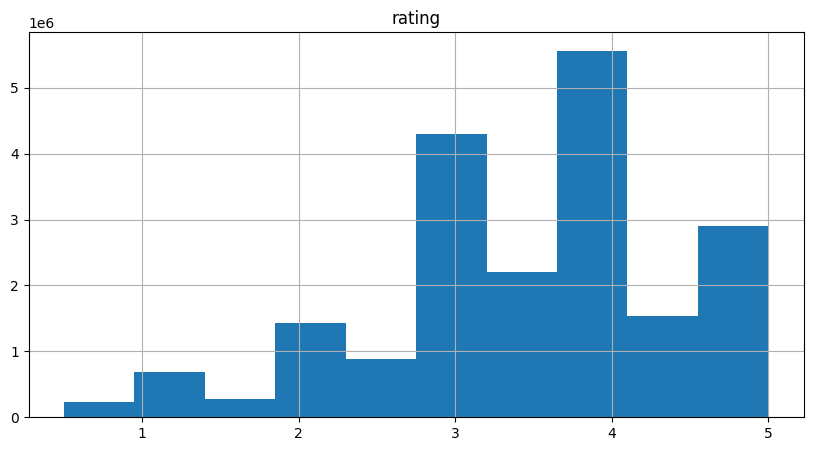

In [5]:
ratings3.hist(column='rating', figsize=(10,5))

<AxesSubplot: >

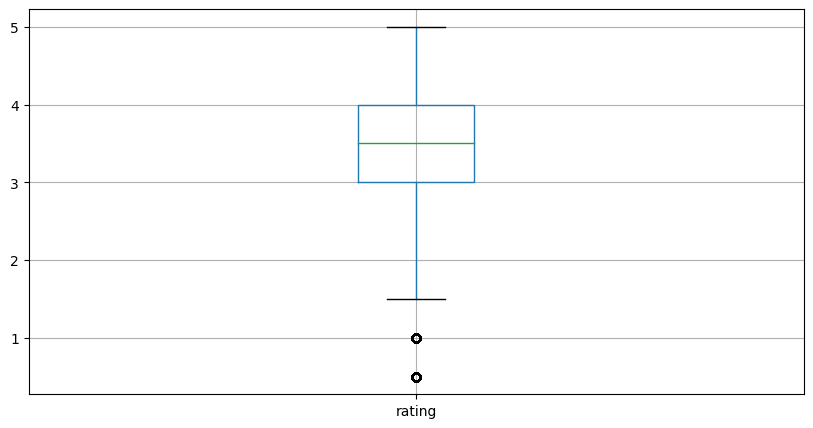

In [6]:
ratings3.boxplot(column='rating', figsize=(10,5))

### Frequent Data Operations

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({
    'sensor1' : np.random.uniform(-2, 1, 10),
    'sensor2' : np.random.uniform(-2, 1, 10),
    'sensor3' : np.random.uniform(-3, 1, 10)
})

df

,sensor1,sensor2,sensor3
0,-1.846377,-1.821125,-2.479971
1,0.941284,-0.563577,-0.333900
2,0.484314,0.884682,-1.803517
3,-1.735414,-0.498039,0.852470
4,-1.264346,-1.103484,-0.770665
5,-1.522785,-1.686017,0.808250
6,0.962154,-1.553829,-2.045963
7,-1.396028,-1.334572,-1.449845
8,0.007044,0.920270,0.997109
9,-1.903084,-0.525378,0.353904


In [4]:
df[df['sensor2'] > 0]

,sensor1,sensor2,sensor3
2,0.484314,0.884682,-1.803517
8,0.007044,0.920270,0.997109


In [5]:
df['sensor4'] = df['sensor3']**2
df

,sensor1,sensor2,sensor3,sensor4
0,-1.846377,-1.821125,-2.479971,6.150256
1,0.941284,-0.563577,-0.333900,0.111489
2,0.484314,0.884682,-1.803517,3.252675
3,-1.735414,-0.498039,0.852470,0.726705
4,-1.264346,-1.103484,-0.770665,0.593924
5,-1.522785,-1.686017,0.808250,0.653269
6,0.962154,-1.553829,-2.045963,4.185966
7,-1.396028,-1.334572,-1.449845,2.102052
8,0.007044,0.920270,0.997109,0.994227
9,-1.903084,-0.525378,0.353904,0.125248


In [9]:
df.drop(df.index[[5]]) # 5. indexi sildik. Kalıcı değişiklik olmuyor. Ataman lazım

,sensor1,sensor2,sensor3,sensor4
0,-1.846377,-1.821125,-2.479971,6.150256
1,0.941284,-0.563577,-0.333900,0.111489
2,0.484314,0.884682,-1.803517,3.252675
3,-1.735414,-0.498039,0.852470,0.726705
4,-1.264346,-1.103484,-0.770665,0.593924
6,0.962154,-1.553829,-2.045963,4.185966
7,-1.396028,-1.334572,-1.449845,2.102052
8,0.007044,0.920270,0.997109,0.994227
9,-1.903084,-0.525378,0.353904,0.125248


In [10]:
del df['sensor1']
df

,sensor2,sensor3,sensor4
0,-1.821125,-2.479971,6.150256
1,-0.563577,-0.333900,0.111489
2,0.884682,-1.803517,3.252675
3,-0.498039,0.852470,0.726705
4,-1.103484,-0.770665,0.593924
5,-1.686017,0.808250,0.653269
6,-1.553829,-2.045963,4.185966
7,-1.334572,-1.449845,2.102052
8,0.920270,0.997109,0.994227
9,-0.525378,0.353904,0.125248


In [2]:
scores = pd.DataFrame({
    "student_id" : [2,2,2,4,4,4,12,12,12,100],
    "physics" : np.random.randint(25, 200, 10),
    "chemistry" : np.random.randint(50, 175, 10),
    "biology" : np.random.randint(25, 200, 10)
})

scores

,student_id,physics,chemistry,biology
0,2,97,119,106
1,2,47,104,154
2,2,146,155,42
3,4,134,110,152
4,4,173,153,134
5,4,159,145,88
6,12,58,84,28
7,12,174,134,158
8,12,80,148,63
9,100,150,103,113


In [4]:
scores.groupby('student_id').mean()

,physics,chemistry,biology
student_id,,,
2,96.666667,126.0,100.666667
4,155.333333,136.0,124.666667
12,104.000000,122.0,83.000000
100,150.000000,103.0,113.000000


In [5]:
tags3 = pd.read_csv('./movielens/tags.csv')
tags3

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


In [6]:
tags3['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [9]:
tags3[['userId', 'movieId']].head()

,userId,movieId
0,18,4141
1,65,208
2,65,353
3,65,521
4,65,592


In [10]:
tags3[1000: 1010]

,userId,movieId,tag,timestamp
1000,359,69526,needed more autobots,1246147544
1001,359,69526,stop using useless characters for filler,1246147545
1002,359,69529,we are all connected. it's not my life or your...,1246918226
1003,359,69640,melvin pervo didn't commit suicide he just off...,1246916553
1004,359,71838,"""Tonite",1256783703
1005,359,71838,Act From,1256783703
1006,359,71838,"Hell!""",1256783703
1007,359,71838,We,1256783703
1008,370,471,funny,1282398961
1009,370,1658,angels,1255283819


In [12]:
tags3[-10:]

,userId,movieId,tag,timestamp
465554,138446,3489,visually appealing,1358983822
465555,138446,7045,family friendly,1358983660
465556,138446,7045,Scary Movies To See on Halloween,1358983660
465557,138446,7164,Peter Pan,1358983855
465558,138446,7164,visually appealing,1358983855
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772
465563,138472,923,rise to power,1194037967


In [14]:
tag_counts = tags3['tag'].value_counts() # tag sütunundaki elemanların kaç kere tekrarlandığını buluyor
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

<AxesSubplot: >

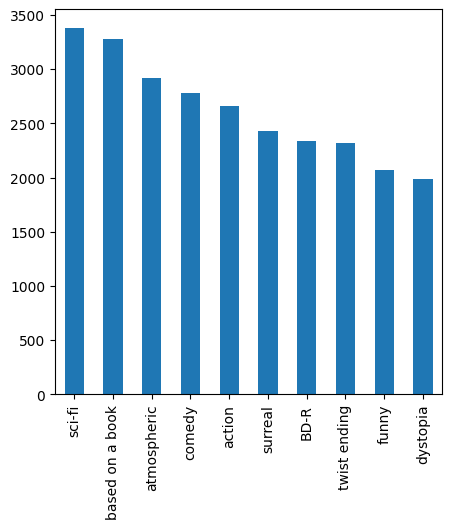

In [16]:
tag_counts[:10].plot(kind="bar", figsize=(5,5))

In [17]:
ratings4 = pd.read_csv('./movielens/ratings.csv')
ratings4.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [19]:
is_higher = ratings4['rating'] >= 4
ratings4[is_higher][-5:]

,userId,movieId,rating,timestamp
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000261,138493,70286,5.0,1258126944


In [20]:
movies4 = pd.read_csv('./movielens/movies.csv')
movies4.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
is_animation = movies4['genres'].str.contains('Animation')
movies4[is_animation][5:15]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
588,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
590,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
604,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


### Groupby and Aggregate

In [24]:
ratings4[['movieId', 'rating']].groupby('rating').count()

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [29]:
ratings4[['movieId', 'rating']].groupby('movieId').mean().head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [30]:
ratings4[['movieId', 'rating']].groupby('movieId').count().head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [31]:
ratings4[['movieId', 'rating']].groupby('movieId').count().tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


### Merging DataFrames

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np

In [5]:
left = pd.DataFrame({
    "_key1": ["K0", "K1", "K2", "K3"],
    "_key2": ["z0", "z1", "z2", "z3"],
    "city": ["city_0", "city_1", "city_2", "city_3"],
    "user_name": ["user_0", "user_1", "user_2", "user_3"]
})


right = pd.DataFrame({
    "_key1": ["K0", "K1", "K2", "K3"],
    "_key2": ["z0", "z1", "z2", "z3"],
    "hire_date": ["h_0", "h_1", "h_2", "h_3"],
    "profession": ["p_0", "p_1", "p_2", "p_3"]
})

right

,_key1,_key2,hire_date,profession
0,K0,z0,h_0,p_0
1,K1,z1,h_1,p_1
2,K2,z2,h_2,p_2
3,K3,z3,h_3,p_3


In [15]:
pd.concat([left, left])

,_key1,_key2,city,user_name
0,K0,z0,city_0,user_0
1,K1,z1,city_1,user_1
2,K2,z2,city_2,user_2
3,K3,z3,city_3,user_3
0,K0,z0,city_0,user_0
1,K1,z1,city_1,user_1
2,K2,z2,city_2,user_2
3,K3,z3,city_3,user_3


In [16]:
pd.concat([left, right])

,_key1,_key2,city,user_name,hire_date,profession
0,K0,z0,city_0,user_0,NaN,NaN
1,K1,z1,city_1,user_1,NaN,NaN
2,K2,z2,city_2,user_2,NaN,NaN
3,K3,z3,city_3,user_3,NaN,NaN
0,K0,z0,NaN,NaN,h_0,p_0
1,K1,z1,NaN,NaN,h_1,p_1
2,K2,z2,NaN,NaN,h_2,p_2
3,K3,z3,NaN,NaN,h_3,p_3


In [17]:
pd.concat([left, right], axis=1, join='inner')

,_key1,_key2,city,user_name,_key1,_key2,hire_date,profession
0,K0,z0,city_0,user_0,K0,z0,h_0,p_0
1,K1,z1,city_1,user_1,K1,z1,h_1,p_1
2,K2,z2,city_2,user_2,K2,z2,h_2,p_2
3,K3,z3,city_3,user_3,K3,z3,h_3,p_3


In [18]:
left.append(right)

C:\Users\User\AppData\Local\Temp\ipykernel_12504\2078442999.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  left.append(right)


,_key1,_key2,city,user_name,hire_date,profession
0,K0,z0,city_0,user_0,NaN,NaN
1,K1,z1,city_1,user_1,NaN,NaN
2,K2,z2,city_2,user_2,NaN,NaN
3,K3,z3,city_3,user_3,NaN,NaN
0,K0,z0,NaN,NaN,h_0,p_0
1,K1,z1,NaN,NaN,h_1,p_1
2,K2,z2,NaN,NaN,h_2,p_2
3,K3,z3,NaN,NaN,h_3,p_3


In [20]:
pd.merge(left, right, how='inner') # en kullanışlısı bu

,_key1,_key2,city,user_name,hire_date,profession
0,K0,z0,city_0,user_0,h_0,p_0
1,K1,z1,city_1,user_1,h_1,p_1
2,K2,z2,city_2,user_2,h_2,p_2
3,K3,z3,city_3,user_3,h_3,p_3


In [26]:
ratings5 = pd.read_csv('./movielens/ratings.csv')
ratings5.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [21]:
tags4 = pd.read_csv('./movielens/tags.csv')
tags4.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [22]:
movies5 = pd.read_csv('./movielens/movies.csv')
movies5.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
# pd.merge(tags4, movies5, how='inner')
t = movies5.merge(tags4, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


In [37]:
avg_ratings = ratings5.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
del avg_ratings['timestamp']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [40]:
box_office = movies5.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [41]:
is_higly_rated = box_office['rating'] >= 4
box_office[is_higly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [43]:
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [44]:
box_office[is_comedy & is_higly_rated][-5:]

,movieId,title,genres,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0


### Frequent String Operations

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [35]:
df = pd.DataFrame({
    '_key1': ['K0', 'K1', 'K2', 'K3'],
    '_key2': ['z0', 'z1', 'z2', 'z3'],
    'city': ['city_0', 'city_1', 'city_2', 'city_3'],
    'user_name': ['user_0', 'user_1', 'user_2', 'user_3'],
    'hire_date': ['h_0', 'h_1', 'h_2', 'h_3'],
    'profession': ['p_0', 'p_1', 'p_2', 'p_3']
})

df

,_key1,_key2,city,user_name,hire_date,profession
0,K0,z0,city_0,user_0,h_0,p_0
1,K1,z1,city_1,user_1,h_1,p_1
2,K2,z2,city_2,user_2,h_2,p_2
3,K3,z3,city_3,user_3,h_3,p_3


In [31]:
df1 = df[:]
df1['city'] = df1['city'].str.split('_')

df1

,_key1,_key2,city,user_name,hire_date,profession
0,K0,z0,"[city, 0]",user_0,h_0,p_0
1,K1,z1,"[city, 1]",user_1,h_1,p_1
2,K2,z2,"[city, 2]",user_2,h_2,p_2
3,K3,z3,"[city, 3]",user_3,h_3,p_3


In [32]:
df

,_key1,_key2,city,user_name,hire_date,profession
0,K0,z0,city_0,user_0,h_0,p_0
1,K1,z1,city_1,user_1,h_1,p_1
2,K2,z2,city_2,user_2,h_2,p_2
3,K3,z3,city_3,user_3,h_3,p_3


In [40]:
df['city'].str.contains('2')

0    False
1    False
2     True
3    False
Name: city, dtype: bool

In [41]:
df['city'].str.replace('_', '##')

0    city##0
1    city##1
2    city##2
3    city##3
Name: city, dtype: object

In [57]:
df['city'].str.extract( '([a-zA-Z ]+)' ) # sadece kelimeleri aldı. Sayıları veya karekterleri almadı

,0
0,city
1,city
2,city
3,city


In [58]:
df['city'].str.extract('(\d)') # sadece sayıları aldı

,0
0,0
1,1
2,2
3,3


In [2]:
movies6 = pd.read_csv('./movielens/movies.csv')
movies6.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [61]:
movies_genres = movies6['genres'].str.split('|', expand = True)  # expand=true, liste değil dataframe dönmesi için kullanılır
movies_genres

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
27273,Comedy,None,None,None,None,None,None,None,None,None
27274,Comedy,None,None,None,None,None,None,None,None,None
27275,Adventure,None,None,None,None,None,None,None,None,None
27276,(no genres listed),None,None,None,None,None,None,None,None,None


In [62]:
movies_genres['isComedy'] = movies6['genres'].str.contains('Comedy')
movies_genres.head()

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True


In [63]:
movies6['year'] = movies6['title'].str.extract('.*\((.*)\).*', expand=True)
movies6.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


In [ ]:
"""
# Title kısmında parantez içindeki tarihleri almadan sadece isimlerini alma yöntemleri

df['titles'] = df['movie_title'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
df['titles1'] = df['movie_title'].str.split('(', 1).str[0].str.strip()
df['titles2'] = df['movie_title'].str.replace(r'\([^)]*\)', '').str.strip()
print df

"""

In [3]:
# is_just_comedy = movies6['genres'] == 'Comedy'
#movies6[is_just_comedy]

is_just_comedy = movies6['genres'].str.contains('^Comedy$')
movies6[is_just_comedy]

,movieId,title,genres
4,5,Father of the Bride Part II (1995),Comedy
17,18,Four Rooms (1995),Comedy
18,19,Ace Ventura: When Nature Calls (1995),Comedy
64,65,Bio-Dome (1996),Comedy
68,69,Friday (1995),Comedy
...,...,...,...
27254,131158,"Manta, Manta (1991)",Comedy
27266,131237,What Men Talk About (2010),Comedy
27271,131250,No More School (2000),Comedy
27273,131254,Kein Bund für's Leben (2007),Comedy


### Parsing Timestamps

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
tags5 = pd.read_csv('./movielens/tags.csv')
tags5.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [7]:
tags5['parsed_time'] = pd.to_datetime(tags5['timestamp'], unit='s') # unit saniyenin hangi cinsten olacağını gösterir
tags5.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [8]:
grater_than_t = tags5['parsed_time'] > '2015-02-01'
tags5[grater_than_t]

,userId,movieId,tag,timestamp,parsed_time
301,318,260,1970s,1424472169,2015-02-20 22:42:49
302,318,260,fantasy,1424472169,2015-02-20 22:42:49
303,318,260,sci-fi,1424472169,2015-02-20 22:42:49
304,318,115149,Action,1424534310,2015-02-21 15:58:30
305,318,115149,Revenge,1424534283,2015-02-21 15:58:03
...,...,...,...,...,...
464962,138301,109487,science fiction,1423178255,2015-02-05 23:17:35
464963,138301,109487,Self-Indulgent,1423178219,2015-02-05 23:16:59
464964,138301,109487,space,1423178343,2015-02-05 23:19:03
464965,138301,109487,visually appealing,1423178319,2015-02-05 23:18:39


In [10]:
tags5.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


In [11]:
ratings6 = pd.read_csv('./movielens/ratings.csv')
ratings6.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [18]:
average_rating = ratings6[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [16]:
movies7 = pd.read_csv('./movielens/movies.csv')
movies7.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
joined = movies7.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [23]:
joined.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_10268\2008983648.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  joined.corr()


,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


In [24]:
joined['year'] = joined['title'].str.extract('.*\((.*)\).*', expand=True)
joined.head()

,movieId,title,genres,rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,1995
4,5,Father of the Bride Part II (1995),Comedy,3.064592,1995


In [27]:
yearly_average = joined[['rating', 'year']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


<AxesSubplot: xlabel='year'>

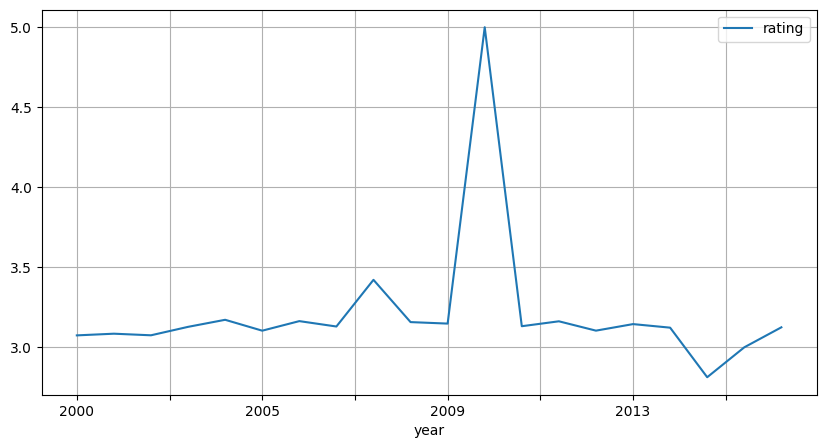

In [28]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(10,5), grid=True)